In [1]:
# Install PyTesseract and setup on Colab
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (11.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

### **Optical Character Recognition with PyTesseract & EASY OCR**

![](https://miro.medium.com/max/1400/1*X7RfC5wOZ-Gsoo95Ez1FvQ.png)
Source - https://medium.com/@balaajip/optical-character-recognition-99aba2dad314

In [3]:
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt

pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

### First OCR

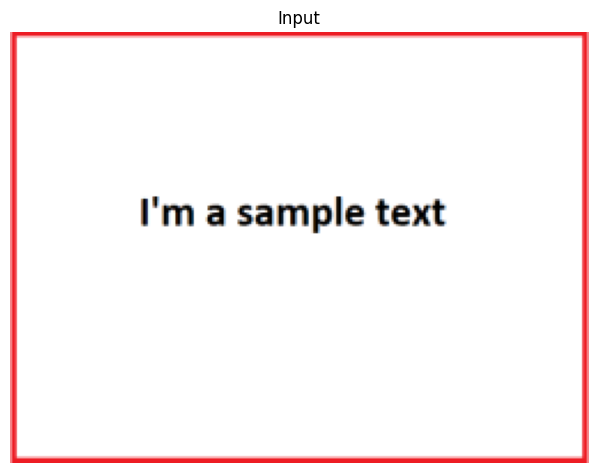



Result: I'ma sample text

 



In [9]:
img = cv2.imread('/content/sampletext.png')
imshow('Input', img)

txt = pytesseract.image_to_string(img)
print('\n')
print('Result: {}'.format(txt))

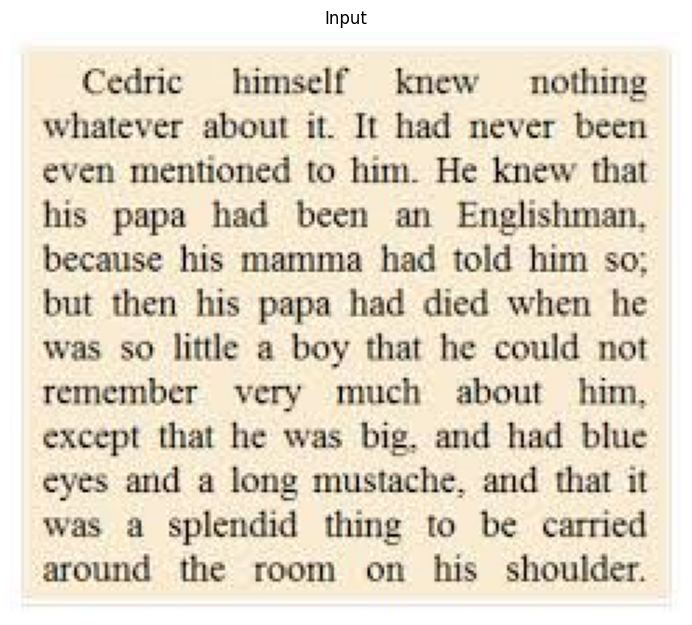



Result: Cedric himself knew nothing
whatever about it. It had never been
even mentioned to him. He knew that
his papa had been an Englishman,
because his mamma had told him so;
but then his papa had died when he
was 50 little a boy that he could not
remember very much about him,
except that he was big, and had blue
eyes and a long mustache, and that it
was a splendid thing to be carried
around the room on his shoulder.

 



In [13]:
img = cv2.imread('/content/images.jpg')
imshow('Input', img)

txt = pytesseract.image_to_string(img)
print('\n')
print('Result: {}'.format(txt))

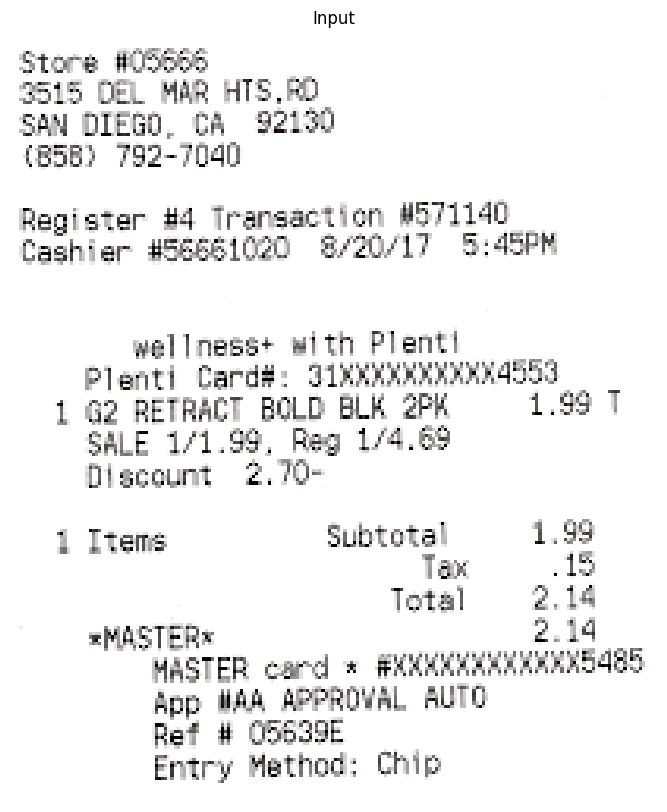



Result:  

S25 OBL HAR HTS, 50
Si O1EG0, ch 22100,
(a0) 782-7040

agister 4 Transaction #57140
Gaanter WeeGG1020 8/20/17 5:<PH

wel ness wth Plant!
lent! Cardi: SUnKRAAIOKASS

1 G2 RETRACT BOLD BLK 2K 1.99 7
SALE 1/1.89, Reg 174.69
Biscours” 2:70

1 Tens subcotal 1.98
Tx 15
yotal 2.14

nate 2

MASTER cord» moKKKHAHHKIAEGES
pp Waa aDSRDVRL ALTO

fet # Co5sae

Entry Method: chip



In [14]:
img = cv2.imread('/content/images.png')
imshow('Input', img)

txt = pytesseract.image_to_string(img)
print('\n')
print('Result: {}'.format(txt))

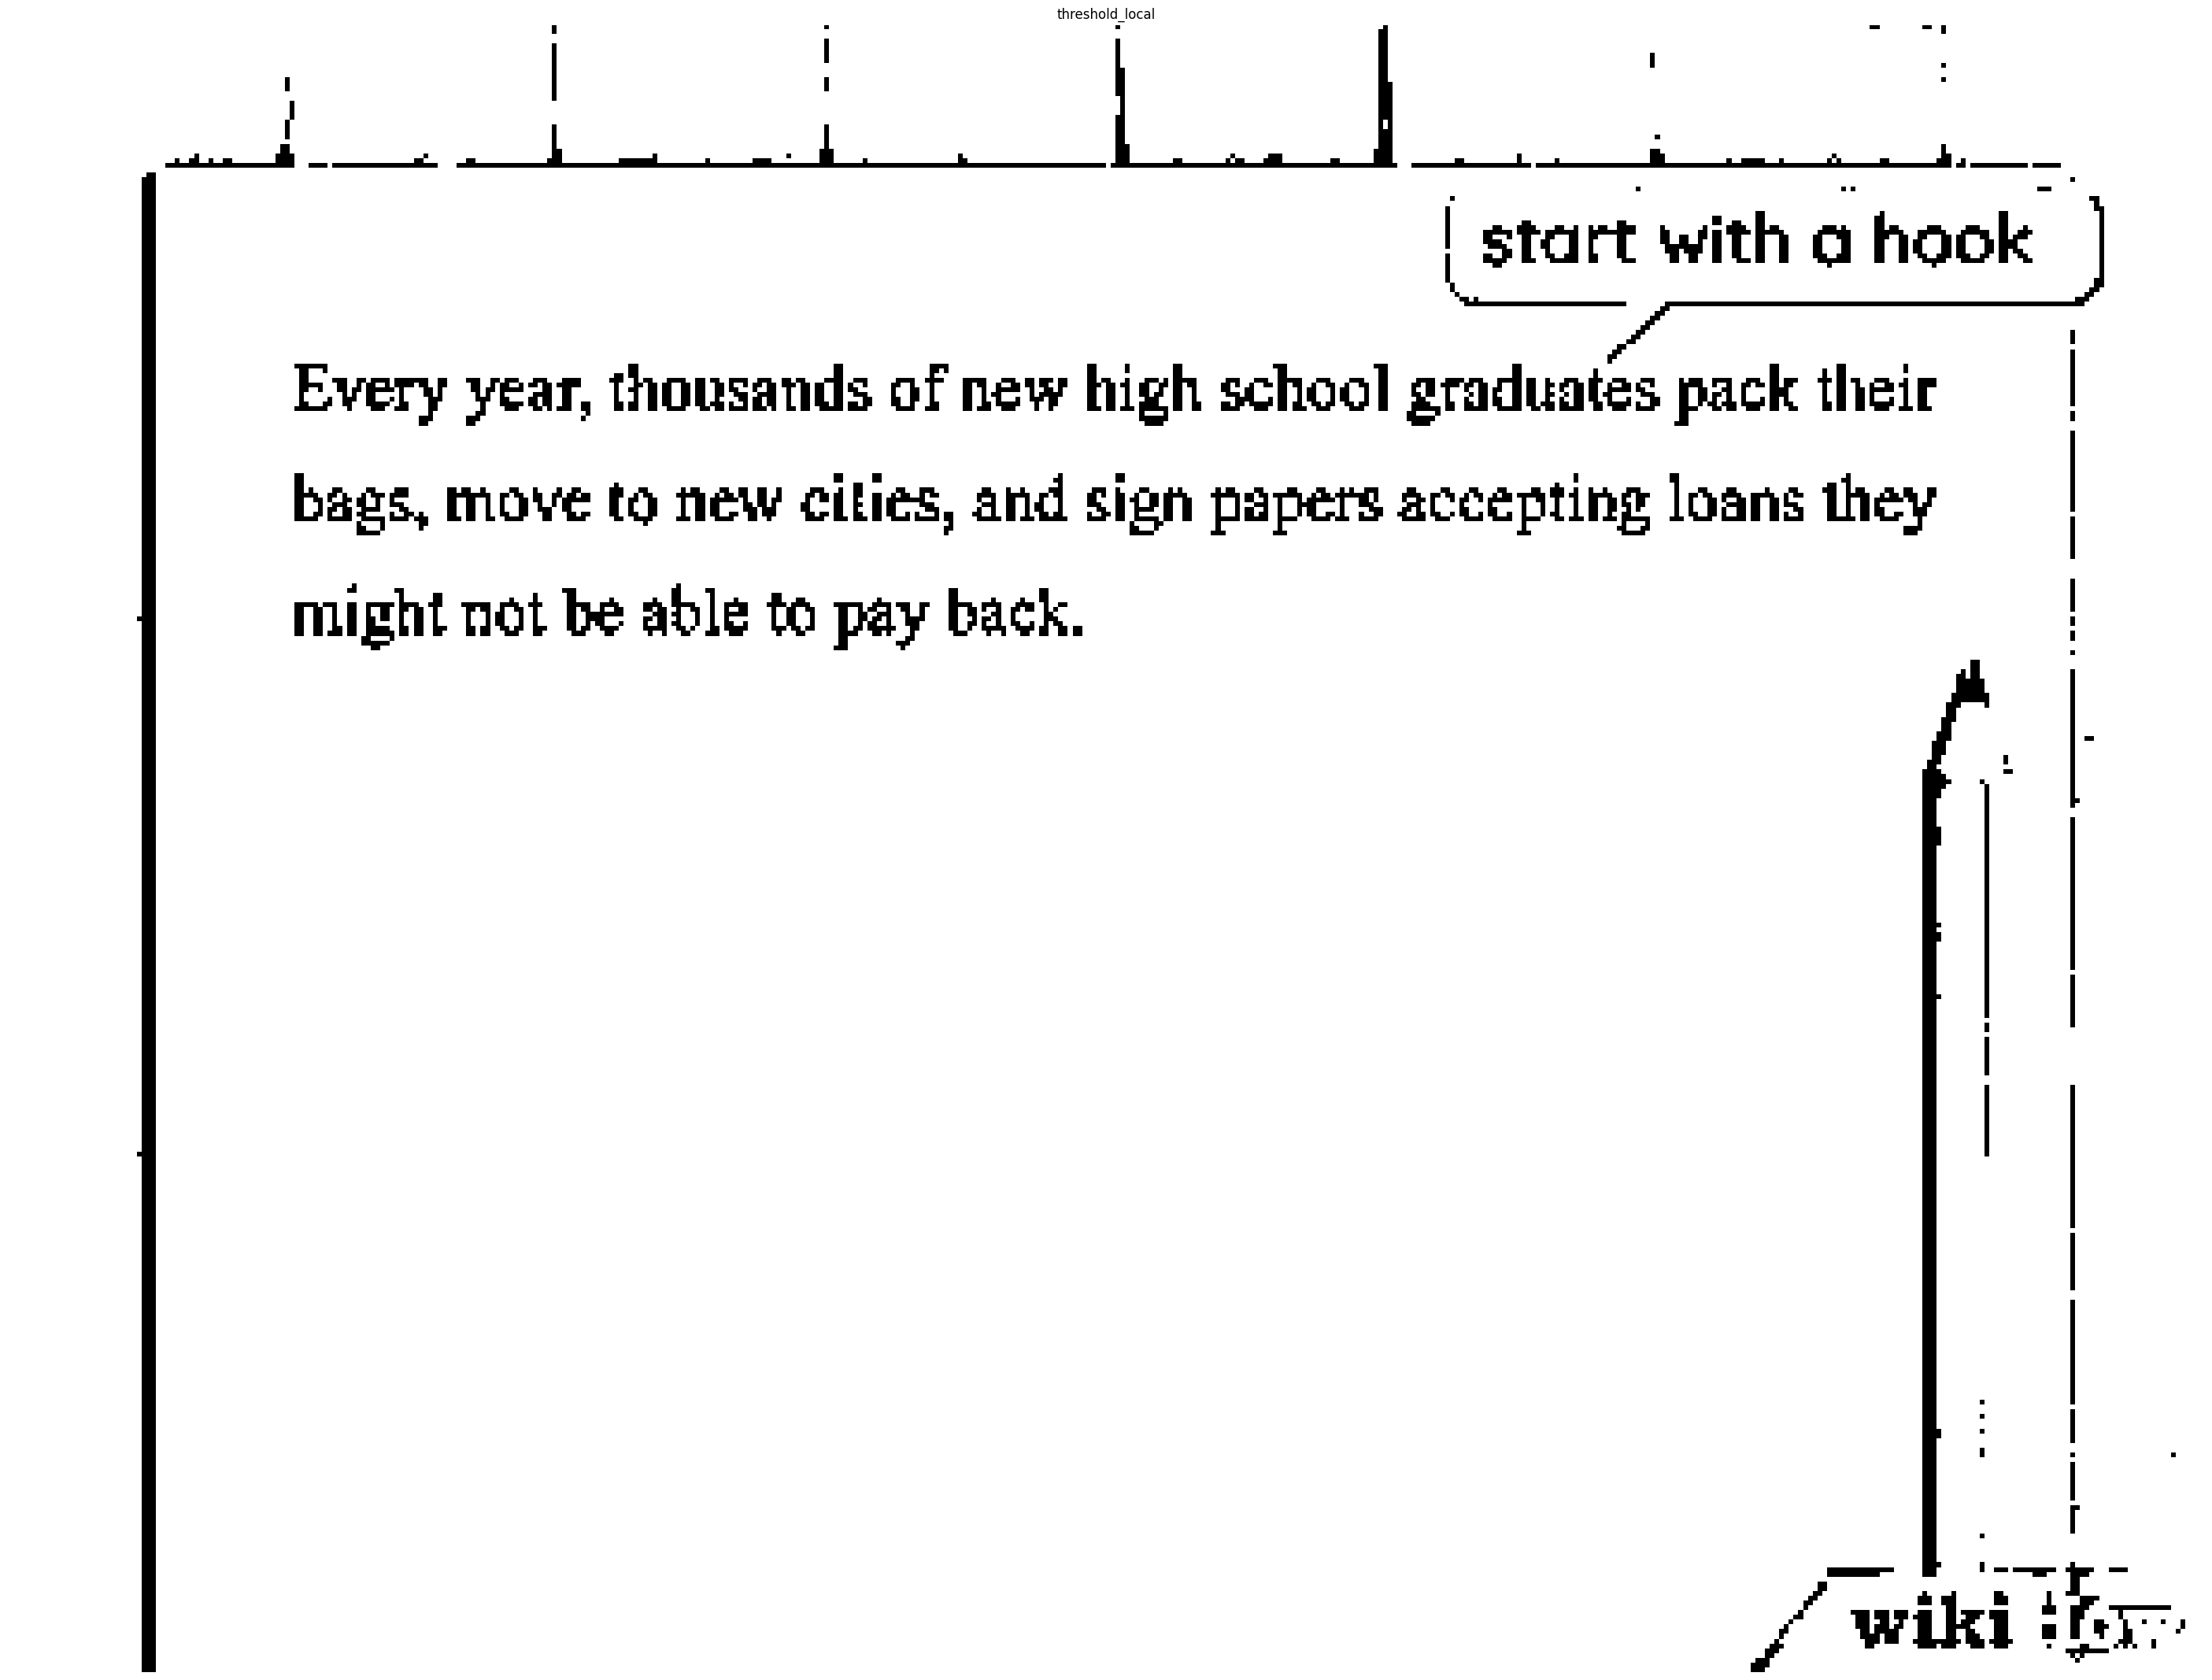

PyTesseract Extracted: elo a

i i :
start with a hook

Every year, thousands of new high school graduatés pack theit

 

bags, move to new cities, and sign papers accepting loans they
might not be able to pay back.

i
J

 



In [16]:
from skimage.filters import threshold_local

img = cv2.imread('/content/img.jpg.jpg')

V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method='gaussian')

# Apply the threshold operation
thresh = (V > T).astype("uint8") * 255
imshow("threshold_local", thresh, size = 48)

output_txt = pytesseract.image_to_string(thresh)
print("PyTesseract Extracted: {}".format(output_txt))

### **Thresholding Helps A lot**

Typically a good preprocessing pipeline for OCR recognition will contain some or more of the following processes:
1. Bluring
2. Thresholding
3. Deskewing
4. Dilation/Erosion/Opening/Closing
5. Noise Removal

### **Draw Recognized regions**

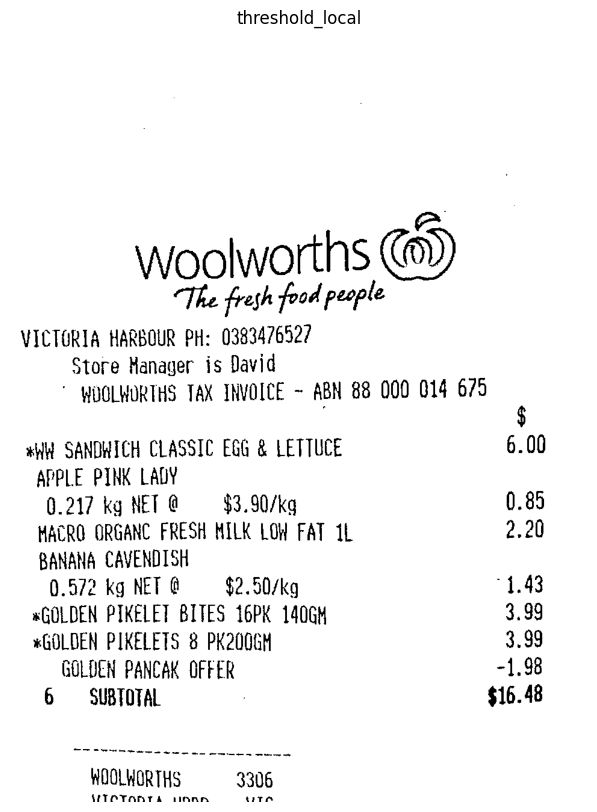

PyTesseract Extracted: o
Woolworths @)
The fresh food people
VICTORIA HARBOUR PH: 0383476527

Store Manager is David
" WOOLHORTHS TAX INVOICE ~ ABN 88 000 014 675

wh SANDWICH CLASSIC EGG & LETTUCE 6.00
APPLE PINK LAUY
G.217 kg NET @ = $3.90/kg 0.85
HACRO ORGANC FRESH NILK LOW FAT IL 2.20
BANANA CAVENDISH
0.572 kg NET @ = $2.50/kg “1.43
GOLDEN PIKELET BITES 16PK 140GH 3.99
GOLDEN PIKELETS 8 PK2OOGH 3.99
GOLDEN PANCAK OFFER -1,98
6 = SUBTOTAL $16.48

WOOLWORTHS 3306

tITAT ANT A DIAnR



In [18]:
image = cv2.imread('/content/Receipt-woolworth.jpg')

# We get the Value component from the HSV color space
# then we apply adaptive thresholdingto
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

# Apply the threshold operation
thresh = (V > T).astype("uint8") * 255
imshow("threshold_local", thresh)

output_txt = pytesseract.image_to_string(thresh)
print("PyTesseract Extracted: {}".format(output_txt))

In [20]:
from pytesseract import Output

d = pytesseract.image_to_data(thresh, output_type = Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


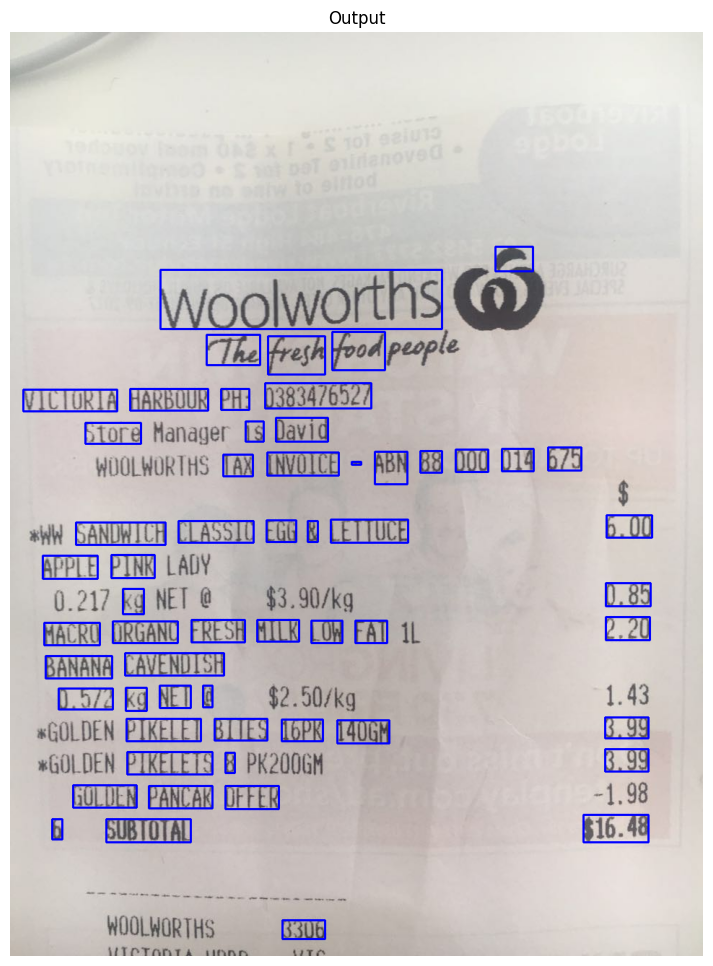

In [22]:
n_boxes = len(d['text'])
for i in range(n_boxes):
  if int(d['conf'][i]) > 60:
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    image = cv2.rectangle(image, (x,y), (x+w, y+h), (255,0,0), 2)
imshow('Output', image, size=12)

### **EASY OCR**

In [23]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 11.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [27]:
import cv2
cv2.__version__

'4.8.0'

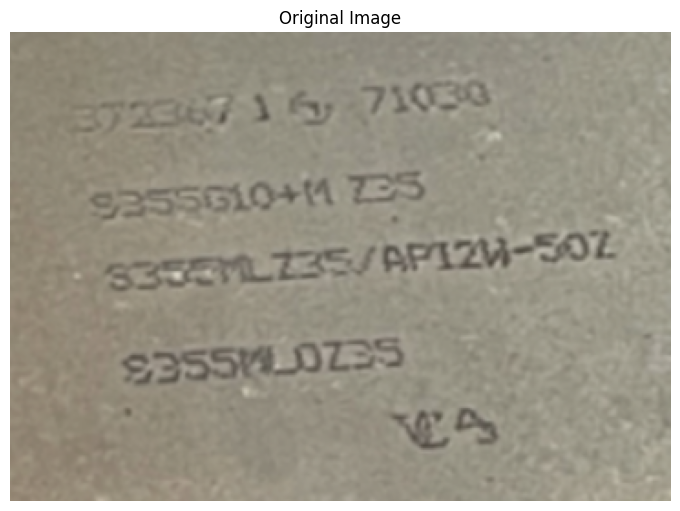

Detecting and OCR'ing text from input image...
Completed in 2.0920472145080566 seconds


In [31]:
from easyocr import Reader
import pandas as pd
import time

# load the input image from disk
image = cv2.imread("/content/Screenshot 2024-04-13 072237.png")
imshow("Original Image", image, size = 12)

# OCR the input image using EasyOCR
print("Detecting and OCR'ing text from input image...")
reader = Reader(['en'], gpu = False)

ts = time.time()
results = reader.readtext(image)
te = time.time()
td = te - ts
print(f'Completed in {td} seconds')

In [32]:
results

[([[27, 19], [269, 19], [269, 62], [27, 62]],
  '377367 !f 71030',
  0.15594890312937043),
 ([[38, 69], [232, 69], [232, 108], [38, 108]],
  '835sg10+M25',
  0.15198881258424204),
 ([[44, 100], [337, 100], [337, 149], [44, 149]],
  '835EMLZZSVAPIZM-SoZ',
  0.0883811364156502),
 ([[54, 161], [220, 161], [220, 199], [54, 199]],
  'S3550L0z35',
  0.2517810159381956),
 ([[211, 200], [270, 200], [270, 231], [211, 231]], '15', 0.08565710137360924)]

 Probability of Text: 15.595% OCR'd Text: 377367 !f 71030
 Probability of Text: 15.199% OCR'd Text: 835sg10+M25
 Probability of Text: 8.838% OCR'd Text: 835EMLZZSVAPIZM-SoZ
 Probability of Text: 25.178% OCR'd Text: S3550L0z35
 Probability of Text: 8.566% OCR'd Text: 15


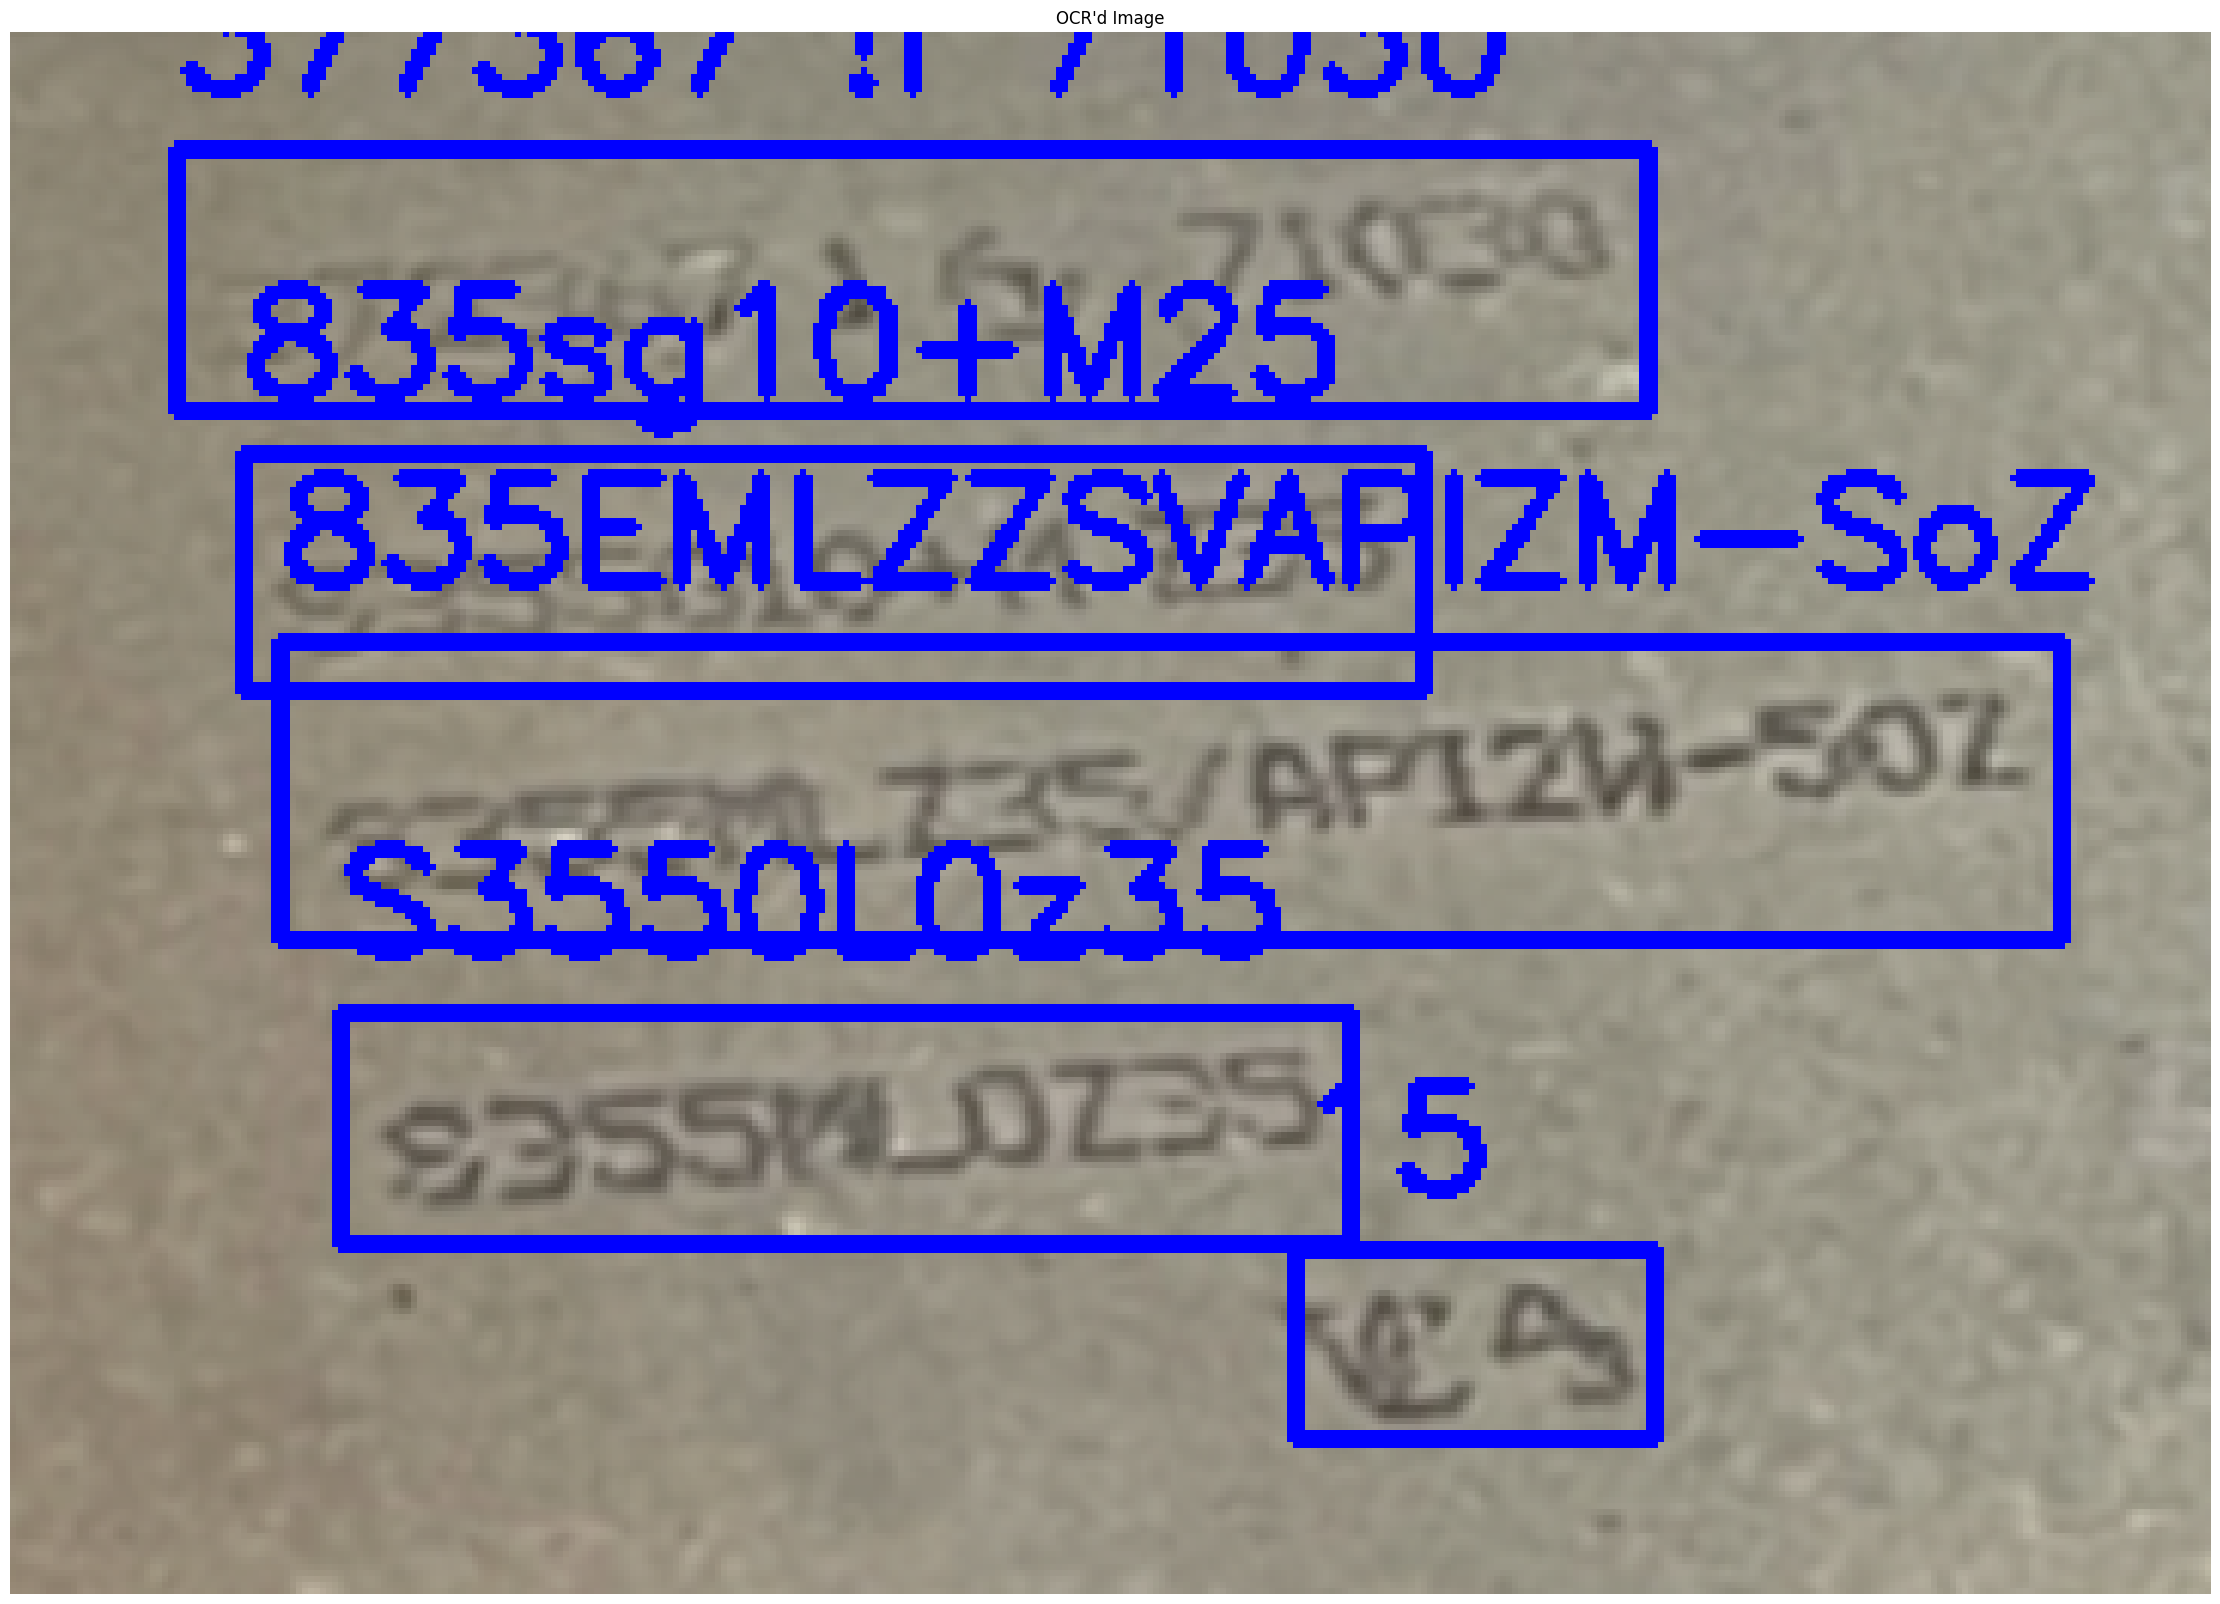

In [34]:
all_text = []

# iterate over our extracted text
for (bbox, text, prob) in results:
    # display the OCR'd text and the associated probability of it being text
    print(f" Probability of Text: {prob*100:.3f}% OCR'd Text: {text}")

    # get the bounding box coordinates
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    # Remove non-ASCII characters from the text so that
    # we can draw the box surrounding the text overlaid onto the original image
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    all_text.append(text)
    cv2.rectangle(image, tl, br, (255, 0, 0), 2)
    cv2.putText(image, text, (tl[0], tl[1] - 10),
      cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# show the output image
imshow("OCR'd Image", image, size = 40)

Progress: |██████████████████████████████████████████████████| 100.0% Complete[INFO] 0.0000: 
[INFO] 0.0000: 
[INFO] 0.0000: 
[INFO] 0.0220: 900
[INFO] 0.9169: Woolworths
[INFO] 0.2355: The fregh food
[INFO] 0.6125: VICIURIA HARBOUR PH:  0383476527
[INFO] 0.7185: Store Hanager
[INFO] 0.6325: i$ ٥avid
[INFO] 0.3334: WUULWURIHS TAX INVOICE
[INFO] 0.6725: ABN 88 000 014 675
[INFO] 0.9711: $
[INFO] 0.1758: *Ah SANDHICH CLASSIC EGG & LETIUCE
[INFO] 0.8745: 6. 00
[INFO] 0.6453: AFPLE PINK LALV
[INFO] 0.2459: 0. 217 kg N٤٢
[INFO] 0.9519: $3. 90/k9
[INFO] 0.7346: 0. 85
[INFO] 0.4177: HACRO ORGANC FRESH HILK LOW FAT 1l
[INFO] 0.5283: 2. 20
[INFO] 0.8945: BANANA CAVENDISH
[INFO] 0.2964: 0. 572 k ٤٢
[INFO] 0.3659: 0
[INFO] 0.9980: $2
[INFO] 0.9854: 1. 43
[INFO] 0.5516: *GULDEN PIKELEI BIES 16PK 14OGH
[INFO] 0.9248: 3. 99
[INFO] 0.3364: »GOLIEN PIKELETS 8 PKZUUIH
[INFO] 0.9786: 3. 99
[INFO] 0.3624: fULILN PANCAK OFFER
[INFO] 0.4808: -1. 98
[INFO] 0.4640: ٥
[INFO] 0.3228: SUBTUTAL
[INFO] 0.9978: $1

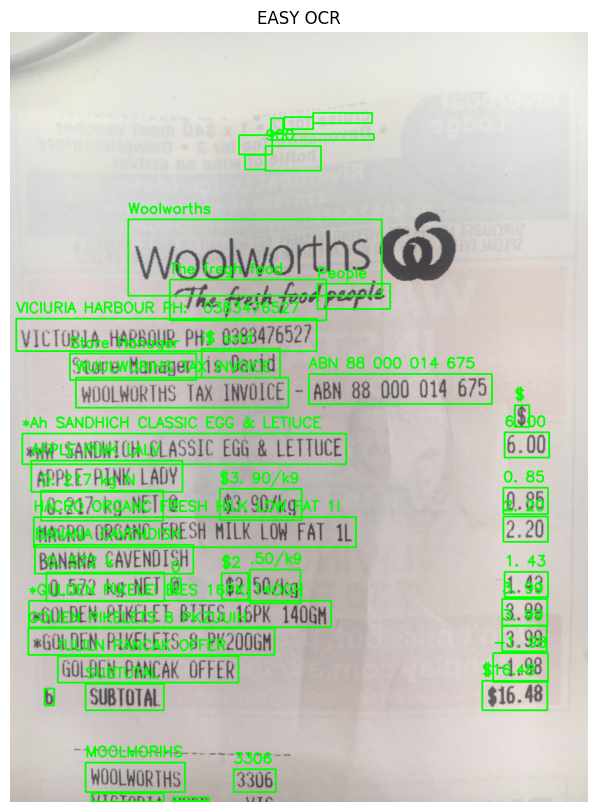

EASY OCR Extracted: .50/k9


In [35]:
def clean_text(text):
	# remove non-ASCII text so we can draw the text on the image
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()

image = cv2.imread('Receipt-woolworth.jpg')

reader = Reader(["en","ar"], gpu=False)
results = reader.readtext(image)

# loop over the results
for (bbox, text, prob) in results:
	# display the OCR'd text and associated probability
	print("[INFO] {:.4f}: {}".format(prob, text))

	# unpack the bounding box
	(tl, tr, br, bl) = bbox
	tl = (int(tl[0]), int(tl[1]))
	tr = (int(tr[0]), int(tr[1]))
	br = (int(br[0]), int(br[1]))
	bl = (int(bl[0]), int(bl[1]))

	# clean text and draw the box surrounding the text along
	text = clean_text(text)
	cv2.rectangle(image, tl, br, (0, 255, 0), 2)
	cv2.putText(image, text, (tl[0], tl[1] - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Apply the threshold operation
#thresh = (V > T).astype("uint8") * 255
imshow("EASY OCR", image)
print("EASY OCR Extracted: {}".format(text))